# **Análise Exploratória de Dados**

Uma Seguradora que fornece Seguro Saúde para seus clientes agora  precisa prever se os segurados (clientes) do ano passado também terão interesse no Seguro de Veículos fornecido pela empresa.

Agora, para prever se o cliente estaria interessado em seguro de veículo, há informações sobre dados demográficos (gênero, idade, tipo de código de região), Veículos (idade do veículo, danos), apólice (Premium, canal de fornecimento) etc.

O Objetivo é construir um modelo para prever se um cliente estaria interessado.Isso será extremamente útil para a empresa, para planejar adequadamente sua estratégia de comunicação para alcançar esses clientes e otimizar seu modelo de negócios e receita.










Bibliotecas

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sidetable as stb

from sklearn.preprocessing import OneHotEncoder
warnings.filterwarnings("ignore")


Carga dos dados

In [99]:
train=pd.read_csv('/content/drive/MyDrive/seguros/train.csv')
test=pd.read_csv('/content/drive/MyDrive/seguros/test.csv')

Cópia do dataframe train

In [100]:
data=train.copy()

In [101]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


Renomeando as colunas

In [102]:
#lista com novos nomes das colunas
nomes=['id','sexo','idade','habilitacao','cod_regiao','prev_seguro','veiculo_idade','veiculo_danos','taxa_anual','canal_vendas','tempo_filiado','resposta']



In [103]:
#dicionario os nomes da colunas
colunas=dict(zip(data.columns.to_list(),nomes))


In [104]:
#renomeando as 
data.rename(columns=colunas,inplace=True)

Infomaçãos do dataframe

In [105]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   id             381109 non-null  int64  
 1   sexo           381109 non-null  object 
 2   idade          381109 non-null  int64  
 3   habilitacao    381109 non-null  int64  
 4   cod_regiao     381109 non-null  float64
 5   prev_seguro    381109 non-null  int64  
 6   veiculo_idade  381109 non-null  object 
 7   veiculo_danos  381109 non-null  object 
 8   taxa_anual     381109 non-null  float64
 9   canal_vendas   381109 non-null  float64
 10  tempo_filiado  381109 non-null  int64  
 11  resposta       381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [106]:
desc       = ["ID unico para o cliente.",
              "Sexo do cliente.",
              "Idade do cliente.",
              "0: não tem habilitacao, 1: tem habilitacao.",
              "Codigo unico da regiao do cliente.",
              "1 : Cliente já possui seguro, 0 : Cliente não possui seguro.",
              "Idade do Veiculo.",
              "1 : Cliente ja teve veiculo danificado no passado. 0 : Cliente não teve veiculo danificado no passado.",
              "O valor que o cliente precisa pagar como taxa no ano.",
              "Código para o canal de divulgação ao cliente ou seja. Agentes diferentes, por correio, por telefone, pessoalmente, etc..",
              "Número de dias, o cliente foi associado à empresa.",
              "1 : Cliente esta interessado, 0 : Cliente não esta interessadpo"]

data_desc = []
j = 0
for column in data.columns:
  data_desc.append(
      [
       column,
       data[column].dtypes,
       data[column].isnull().sum(),
       round(data[column].isnull().sum()/len(data)*100, 2),
       data[column].nunique(),
       data[column].unique(),
       desc[j]
       ]
       )
  j += 1

df = pd.DataFrame(data_desc, columns = ['Coluna', 'Dtype', 'Null', 'Null (%)', 'Nunique', 'Unique','Descrição'])
df



,Coluna,Dtype,Null,Null (%),Nunique,Unique,Descrição
0,id,int64,0,0.0,381109,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...",ID unico para o cliente.
1,sexo,object,0,0.0,2,"[Male, Female]",Sexo do cliente.
2,idade,int64,0,0.0,66,"[44, 76, 47, 21, 29, 24, 23, 56, 32, 41, 71, 3...",Idade do cliente.
3,habilitacao,int64,0,0.0,2,"[1, 0]","0: não tem habilitacao, 1: tem habilitacao."
4,cod_regiao,float64,0,0.0,53,"[28.0, 3.0, 11.0, 41.0, 33.0, 6.0, 35.0, 50.0,...",Codigo unico da regiao do cliente.
5,prev_seguro,int64,0,0.0,2,"[0, 1]","1 : Cliente já possui seguro, 0 : Cliente não ..."
6,veiculo_idade,object,0,0.0,3,"[> 2 Years, 1-2 Year, < 1 Year]",Idade do Veiculo.
7,veiculo_danos,object,0,0.0,2,"[Yes, No]",1 : Cliente ja teve veiculo danificado no pass...
8,taxa_anual,float64,0,0.0,48838,"[40454.0, 33536.0, 38294.0, 28619.0, 27496.0, ...",O valor que o cliente precisa pagar como taxa ...
9,canal_vendas,float64,0,0.0,155,"[26.0, 152.0, 160.0, 124.0, 14.0, 13.0, 30.0, ...",Código para o canal de divulgação ao cliente o...


Registros duplicados

In [107]:
train.duplicated().sum()


0

Verificando balanceamento dos Dados

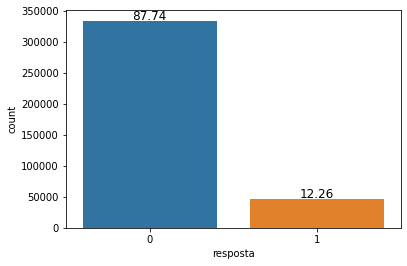

In [108]:
g=sns.countplot(data=data,x='resposta')
for i in g.patches:
  g.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
  
# Apenas 12% dos clientes estão interessados ​​em comprar um seguro de veículo


# Análise Univariada

Analise descritiva 

In [109]:
#seleciona variveis numericas e categoricas
var_num=data.select_dtypes(exclude='object')
var_cat=data.select_dtypes(include='object')

In [110]:
# Media, Mediana
tcm = pd.DataFrame( var_num.apply( np.mean ) ).T
tcmd= pd.DataFrame( var_num.apply( np.median ) ).T

#  std, min, max, range, skew, kurtosis
dvp = pd.DataFrame( var_num.apply( np.std ) ).T 
v_min = pd.DataFrame( var_num.apply( min ) ).T 
v_max = pd.DataFrame( var_num.apply( max ) ).T 
range = pd.DataFrame( var_num.apply( lambda x: x.max() - x.min() ) ).T 
sk= pd.DataFrame( var_num.apply( lambda x: x.skew() ) ).T 
k = pd.DataFrame( var_num.apply( lambda x: x.kurtosis() ) ).T 

# concatenar
df = pd.concat( [v_min, v_max, range, tcm, tcmd, dvp, sk, k] ).T.reset_index()
df.columns = ['Variaveis', 'min', 'max', 'range', 'mean', 'median', 'std', 'skew', 'kurtosis']
df
#A média de dias de clientes na empresa é de 154 dias
# nenhum cliente está na seguradora há 1 ano inteiro
# os clientes mais antigos neste conjunto de dados são 85 e a mediana é 36
# o valor maximo da taxa anual varia 94,13% comparado ao valor media no da taxa_anual


,Variaveis,min,max,range,mean,median,std,skew,kurtosis
0,id,1.0,381109.0,381108.0,190555.000000,190555.0,110016.691870,9.443274e-16,-1.200000
1,idade,20.0,85.0,65.0,38.822584,36.0,15.511591,6.725390e-01,-0.565655
2,habilitacao,0.0,1.0,1.0,0.997869,1.0,0.046109,-2.159518e+01,464.354302
3,cod_regiao,0.0,52.0,52.0,26.388807,28.0,13.229871,-1.152664e-01,-0.867857
4,prev_seguro,0.0,1.0,1.0,0.458210,0.0,0.498251,1.677471e-01,-1.971871
5,taxa_anual,2630.0,540165.0,537535.0,30564.389581,31669.0,17213.132474,1.766087e+00,34.004569
6,canal_vendas,1.0,163.0,162.0,112.034295,133.0,54.203924,-9.000081e-01,-0.970810
7,tempo_filiado,10.0,299.0,289.0,154.347397,154.0,83.671194,3.029517e-03,-1.200688
8,resposta,0.0,1.0,1.0,0.122563,0.0,0.327935,2.301906e+00,3.298788


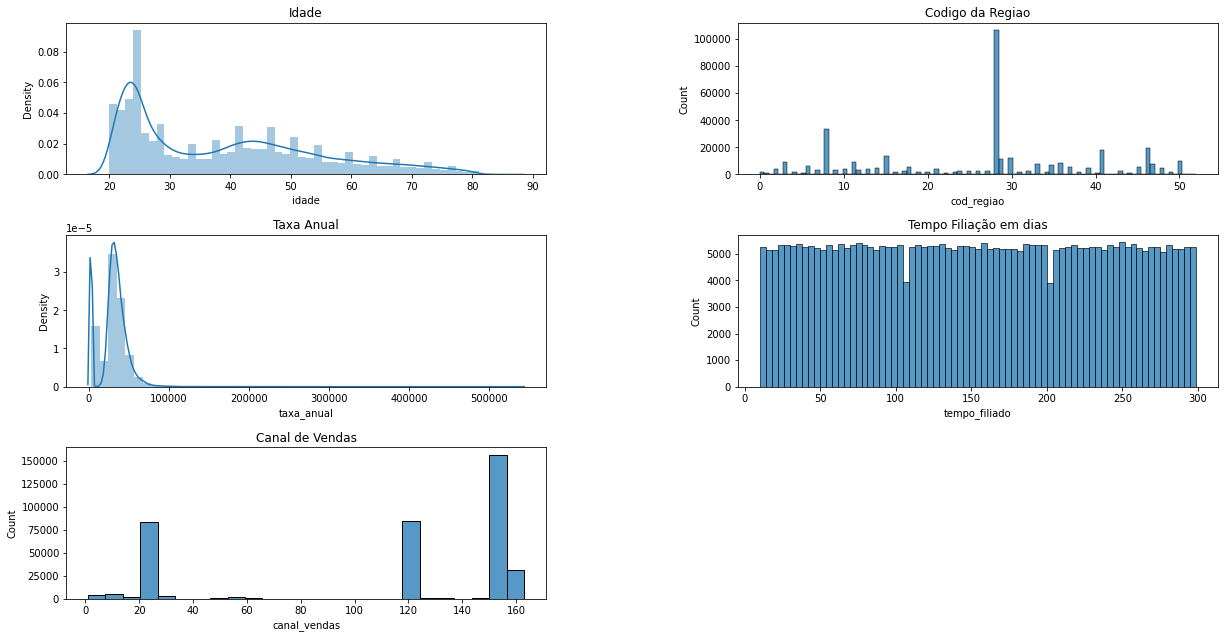

In [111]:
plt.figure(figsize=(20,10))
plt.subplot(3,2,1)
plt.title('Idade')
sns.distplot(data['idade'])

plt.subplot(3,2,2)
plt.title('Codigo da Regiao')

sns.histplot(data['cod_regiao'])

plt.subplot(3,2,3)
plt.title('Taxa Anual')

sns.distplot(data['taxa_anual'])

plt.subplot(3,2,4)
plt.title('Tempo Filiação em dias')

sns.histplot(data['tempo_filiado'])

plt.subplot(3,2,5)
plt.title('Canal de Vendas')

sns.histplot(data['canal_vendas'],bins=25)

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 




In [112]:
var_cat.describe()
# ha mais clientes do sexo masculino
# A maioria do clientes tem um veículo com mais de um ano e menos de dois anos
# a maioria dos clientes neste conjunto de dados teve seu veículo danificado antes


,sexo,veiculo_idade,veiculo_danos
count,381109,381109,381109
unique,2,3,2
top,Male,1-2 Year,Yes
freq,206089,200316,192413


In [113]:
idade = [18, 34, 50, 69, data['idade'].max()]
faixa_idade = ['18-34', '35-50', '51-69', '>70']

data['faixaetaria'] = pd.cut(data['idade'], bins = idade, labels = faixa_idade)
data.head()


,id,sexo,idade,habilitacao,cod_regiao,prev_seguro,veiculo_idade,veiculo_danos,taxa_anual,canal_vendas,tempo_filiado,resposta,faixaetaria
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1,35-50
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0,>70
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1,35-50
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0,18-34
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0,18-34


Verificando outliers

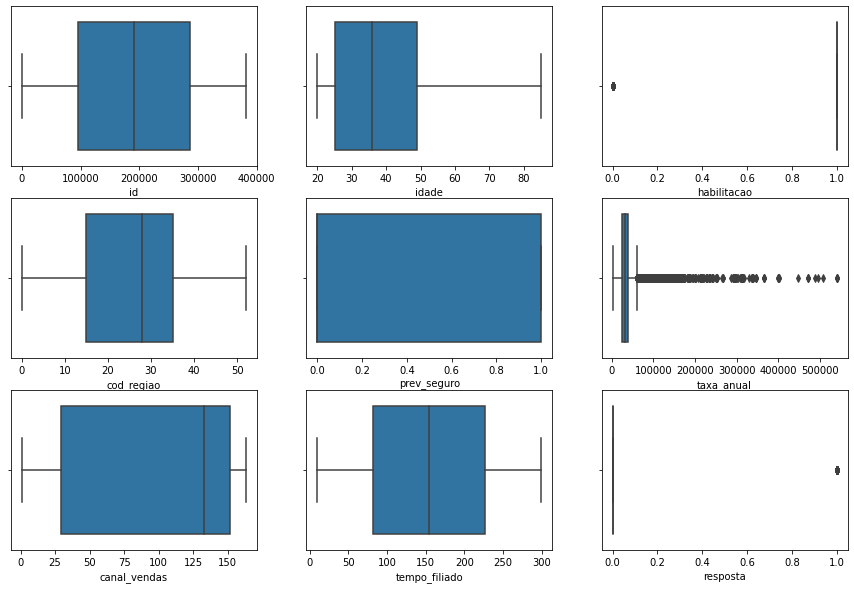

In [114]:
plt.figure(figsize = (15, 10))
x = 1      

for column in var_num:
    plt.subplot(3,3,x)
    sns.boxplot(data[column])
    x += 1
# podemos ver que há muitos outliers na coluna taxa_anual

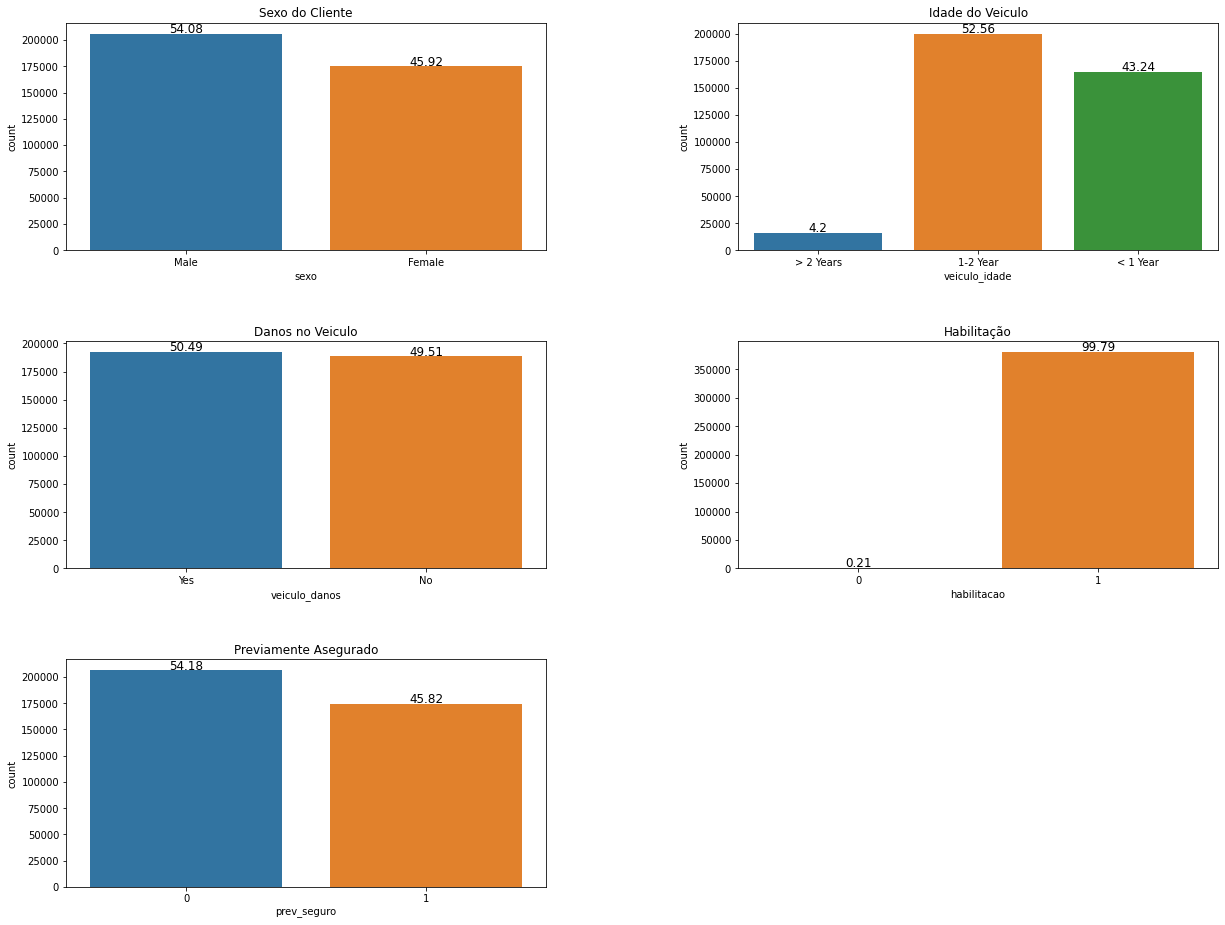

In [115]:
fig, ax = plt.subplots(figsize=(20,15))

plt.subplot(3,2,1)
plt.title('Sexo do Cliente')
ax=sns.countplot(data=data,x='sexo')
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
  
plt.subplot(3,2,2)
plt.title('Idade do Veiculo')
ax=sns.countplot(data=data,x='veiculo_idade')
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
  
plt.subplot(3,2,3)
plt.title('Danos no Veiculo')

ax=sns.countplot(data=data,x='veiculo_danos')
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
  
plt.subplot(3,2,4)
plt.title('Habilitação')
ax =sns.countplot(data=data,x='habilitacao')
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
plt.subplot(3,2,5)
plt.title('Previamente Asegurado')
ax =sns.countplot(data=data,x='prev_seguro')
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
  

plt.subplots_adjust(left=0.1, 
                    bottom=0.1,  
                    right=0.9,  
                    top=0.9,  
                    wspace=0.4,  
                    hspace=0.4) 
# 54% do cliente do seguro saúde é do sexo masculino
# um pouco mais da metade dos clientes não possui seguro de veículo
# 4% dos clientes têm veículo com mais de 2 anos
# metade dos clientes já teve seu veículo danificado e metade não




In [116]:
data['idade'].mean()
#idade média dos clientes é de cerca de 38 a 39 anos



38.822583565331705

In [117]:
data.stb.freq(['cod_regiao'], cum_cols=False)
# código de região 28 tem o maior número de clientes enquando o codigo 52 possui o menor



,cod_regiao,count,percent
0,28.0,106415,27.922458
1,8.0,33877,8.889058
2,46.0,19749,5.181982
3,41.0,18263,4.792067
4,15.0,13308,3.491914
5,30.0,12191,3.198822
6,29.0,11065,2.903369
7,50.0,10243,2.687683
8,3.0,9251,2.427390
9,11.0,9232,2.422404


In [118]:
data.stb.freq(['canal_vendas'], cum_cols=False)
# canal de vendas 152,26,124 são os que possuem uma taxa de sucesso mais efetiva em realizar vendas
# os demais canais ficam abaixo de 5% de resposta efetiva


,canal_vendas,count,percent
0,152.0,134784,35.366260
1,26.0,79700,20.912652
2,124.0,73995,19.415705
3,160.0,21779,5.714638
4,156.0,10661,2.797362
...,...,...,...
150,143.0,1,0.000262
151,123.0,1,0.000262
152,84.0,1,0.000262
153,43.0,1,0.000262


# **Analise Multivariada**


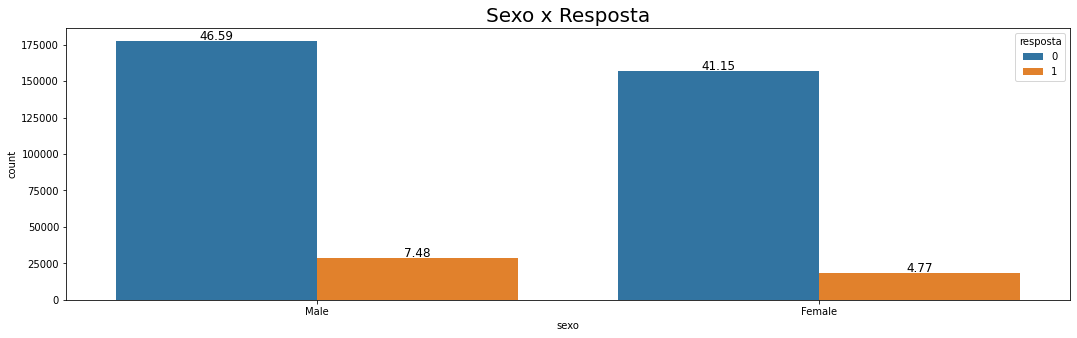

In [119]:
plt.figure(figsize = (18, 5))
plt.title('Sexo x Resposta',fontsize=20)
ax=sns.countplot(data['sexo'], hue = data['resposta'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')


In [120]:
pd.crosstab(index = data['resposta'], columns = data['sexo'], normalize = 'index')
#Homens possuem mais interesse em contratar seguro de automovel do que mulheres

sexo,Female,Male
resposta,,
0,0.469006,0.530994
1,0.389317,0.610683


In [121]:
data[['resposta','idade']].groupby(['resposta']).mean()

,idade
resposta,
0,38.178227
1,43.435560


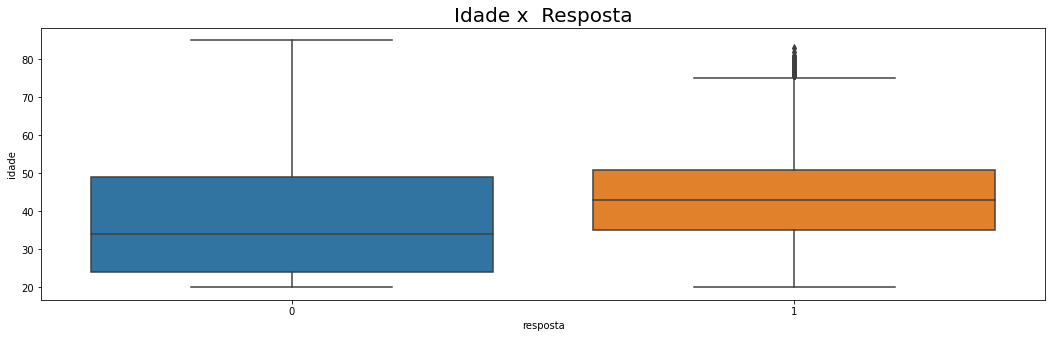

In [122]:
plt.figure(figsize = (18, 5))
plt.title('Idade x  Resposta',fontsize=20)
sns.boxplot(x=data['resposta'], y = data['idade'])


In [123]:
data['faixa_idade']=data['idade'].apply(lambda x: 'ate_30' if x<30 else 'ate_50' if x>=30 and x<50 else 'maior_50')

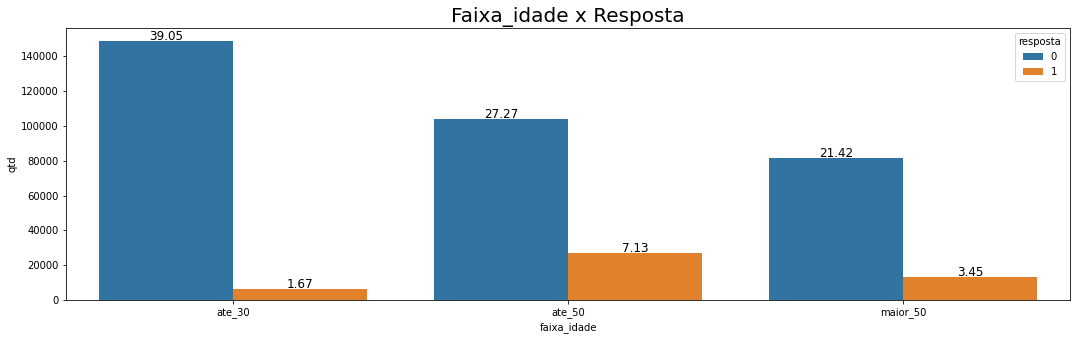

In [124]:
plt.figure(figsize = (18, 5))
plt.title('Faixa_idade x Resposta',fontsize=20)
ax=data[['faixa_idade','resposta']].groupby(['faixa_idade','resposta']).size().reset_index().rename(columns={0:'qtd'})
ax=sns.barplot(data=ax,x='faixa_idade',y='qtd',hue='resposta');
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')

# idade média do cliente interessado no seguro do veículo é de 43 anos
# Podemos ver que clientes mais jovens não estão interessados ​​no seguro do veículo

In [125]:
pd.pivot_table(data,index=["resposta","habilitacao"],values=["idade"],aggfunc=np.mean)
# Os clientes que não possuem habilitação tem em media idade acima dos 60 anos
# Não ha tantos dados sobre não habilitados porque a maioria deles é acima dos 60 anos e a maioria dos clientes da base esta na faixa de 40 anos


idade
resposta habilitacao           
0        0            65.952010
         1            38.114043
1        0            59.073171
         1            43.421822

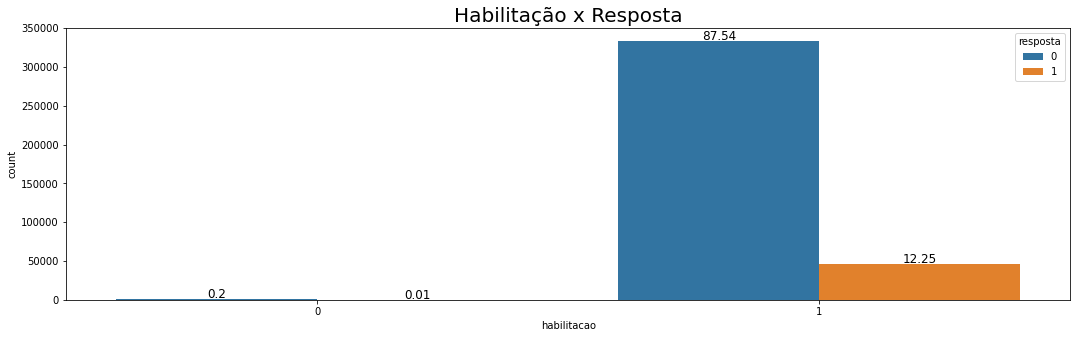

In [126]:
plt.figure(figsize = (18, 5))
plt.title('Habilitação x Resposta',fontsize=20)
ax=sns.countplot(data['habilitacao'], hue = data['resposta'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')

In [127]:
pd.crosstab(index = data['cod_regiao'], columns = data['resposta'], normalize = 'index').sort_values(1,ascending = False).head(5)


resposta,0,1
cod_regiao,,
38.0,0.807996,0.192004
28.0,0.812837,0.187163
19.0,0.837134,0.162866
4.0,0.841755,0.158245
23.0,0.846939,0.153061


[Text(0, 0, '0'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '4'),
 Text(0, 0, '5'),
 Text(0, 0, '6'),
 Text(0, 0, '7'),
 Text(0, 0, '8'),
 Text(0, 0, '9'),
 Text(0, 0, '10'),
 Text(0, 0, '11'),
 Text(0, 0, '12'),
 Text(0, 0, '13'),
 Text(0, 0, '14'),
 Text(0, 0, '15'),
 Text(0, 0, '16'),
 Text(0, 0, '17'),
 Text(0, 0, '18'),
 Text(0, 0, '19'),
 Text(0, 0, '20'),
 Text(0, 0, '21'),
 Text(0, 0, '22'),
 Text(0, 0, '23'),
 Text(0, 0, '24'),
 Text(0, 0, '25'),
 Text(0, 0, '26'),
 Text(0, 0, '27'),
 Text(0, 0, '28'),
 Text(0, 0, '29'),
 Text(0, 0, '30'),
 Text(0, 0, '31'),
 Text(0, 0, '32'),
 Text(0, 0, '33'),
 Text(0, 0, '34'),
 Text(0, 0, '35'),
 Text(0, 0, '36'),
 Text(0, 0, '37'),
 Text(0, 0, '38'),
 Text(0, 0, '39'),
 Text(0, 0, '40'),
 Text(0, 0, '41'),
 Text(0, 0, '42'),
 Text(0, 0, '43'),
 Text(0, 0, '44'),
 Text(0, 0, '45'),
 Text(0, 0, '46'),
 Text(0, 0, '47'),
 Text(0, 0, '48'),
 Text(0, 0, '49'),
 Text(0, 0, '50'),
 Text(0, 0, '51'),
 Text(0, 0, '52')]

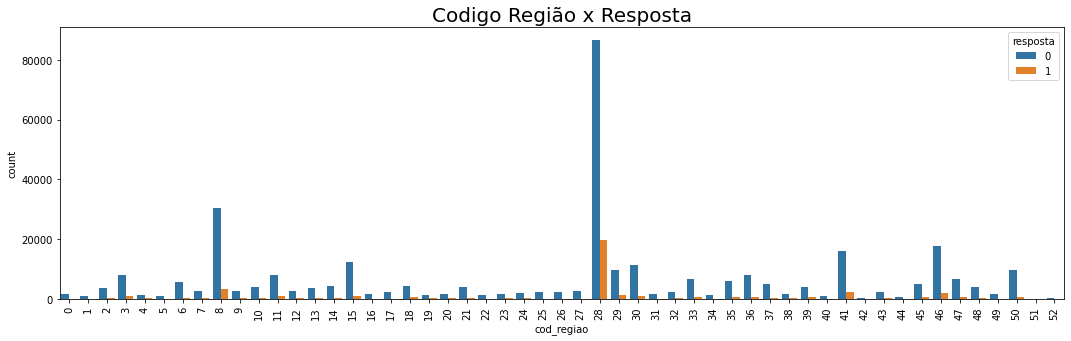

In [128]:
# região 28 tem o maior número de clientes e com maior precentuas de clientes interessados
# A regiao 38 possui mais clientes interessados se comparada com a regiao 28
# As regiao com melhor percentual de resposta utilizam os canais de venda mais eficientes

plt.figure(figsize = (18, 5))
plt.title('Codigo Região x Resposta',fontsize=20)
ax=sns.countplot(data['cod_regiao'], hue = data['resposta'])
ax.set_xticklabels(ax.get_xticks(), rotation = 90) 


In [129]:
pd.crosstab(index = data['cod_regiao'], columns = data['resposta'], normalize = 'index').sort_values(1, ascending = False).head()


resposta,0,1
cod_regiao,,
38.0,0.807996,0.192004
28.0,0.812837,0.187163
19.0,0.837134,0.162866
4.0,0.841755,0.158245
23.0,0.846939,0.153061


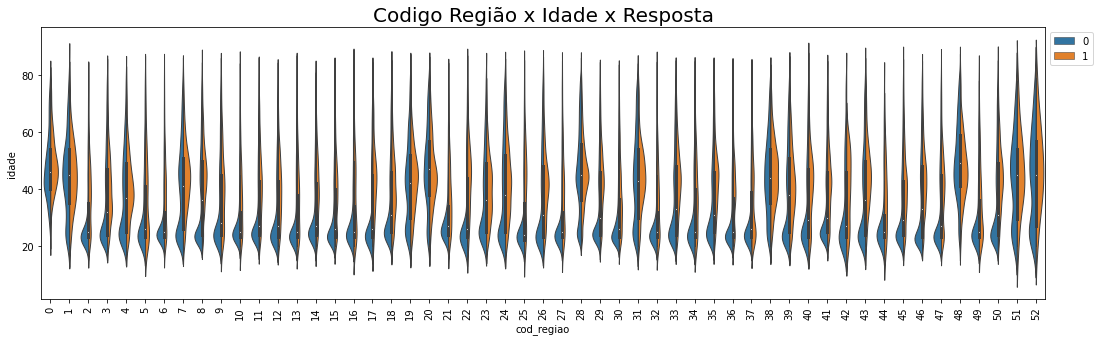

In [130]:
plt.figure(figsize = (18, 5))
plt.title('Codigo Região x Idade x Resposta',fontsize=20)
ax=sns.violinplot(data = data,x = 'cod_regiao', y = 'idade', hue = 'resposta', split = True, linewidth = 1)
ax.set_xticklabels(ax.get_xticks(), rotation = 90) 
ax.legend(loc = 2,bbox_to_anchor = (1,1))


No handles with labels found to put in legend.


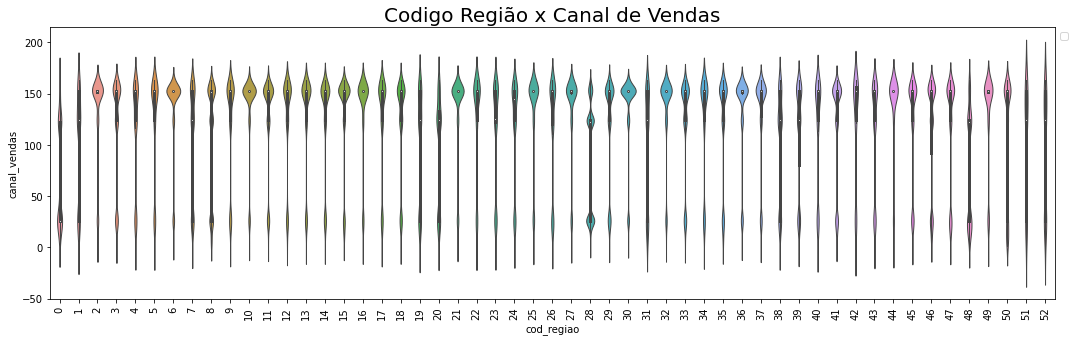

In [131]:
plt.figure(figsize = (18, 5))
plt.title('Codigo Região x Canal de Vendas',fontsize=20)
ax=sns.violinplot(data = data,x = 'cod_regiao', y = 'canal_vendas', split = True, linewidth = 1)
ax.set_xticklabels(ax.get_xticks(), rotation = 90) 
ax.legend(loc = 2,bbox_to_anchor = (1,1))


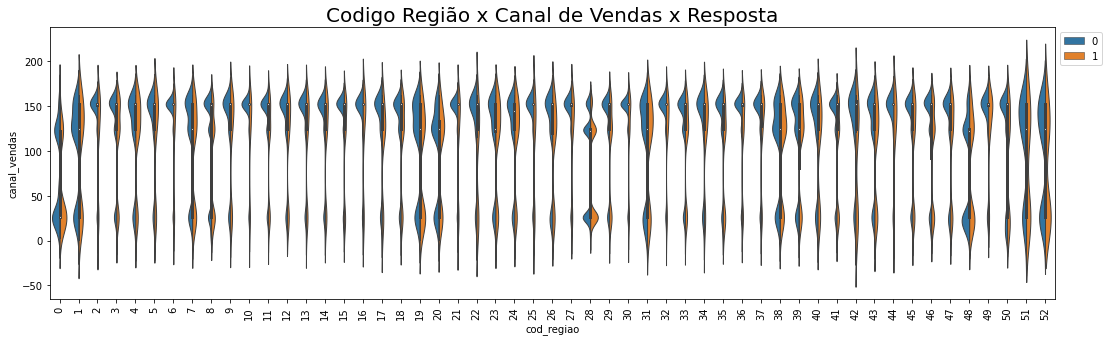

In [132]:
plt.figure(figsize = (18, 5))
plt.title('Codigo Região x Canal de Vendas x Resposta',fontsize=20)
ax=sns.violinplot(data = data,x = 'cod_regiao', y = 'canal_vendas', hue = 'resposta', split = True, linewidth = 1)
ax.set_xticklabels(ax.get_xticks(), rotation = 90) 
ax.legend(loc = 2,bbox_to_anchor = (1,1))


In [133]:
pd.crosstab(index = data['resposta'], columns = data['prev_seguro'], normalize = 'columns')

prev_seguro,0,1
resposta,,
0,0.774546,0.999095
1,0.225454,0.000905


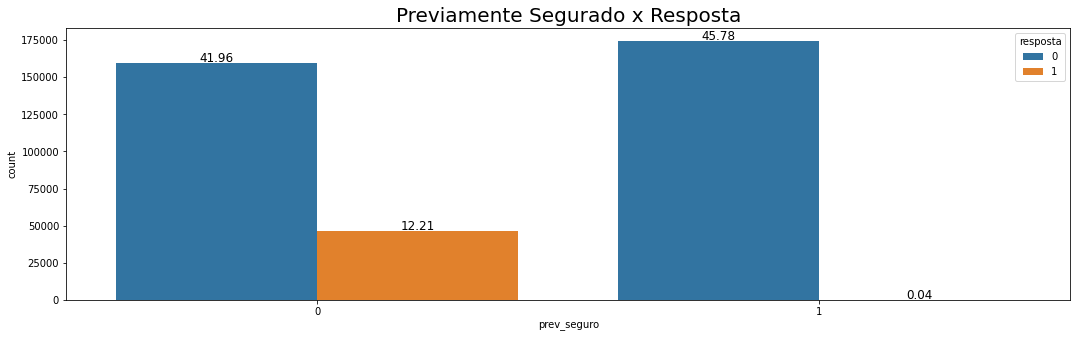

In [134]:
plt.figure(figsize = (18, 5))
plt.title('Previamente Segurado x Resposta',fontsize=20)
ax=sns.countplot(data['prev_seguro'], hue = data['resposta'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
  # clientes que ja possuem seguro de automovel mostram não tem interesse em adquirir um novo seguro
  # dos clientes que não possuem seguro apenas 12% se mostraram interessados em adquirir um seguro de automovel

In [135]:
pd.crosstab(index = data['prev_seguro'], columns = data['resposta'], normalize = 'columns')


resposta,0,1
prev_seguro,,
0,0.478258,0.996617
1,0.521742,0.003383


In [136]:
data[['prev_seguro','idade']].groupby(['prev_seguro']).mean()
#Clientes mais jovens provavelmente ja posssuem um seguro de automovel

,idade
prev_seguro,
0,42.45564
1,34.52684


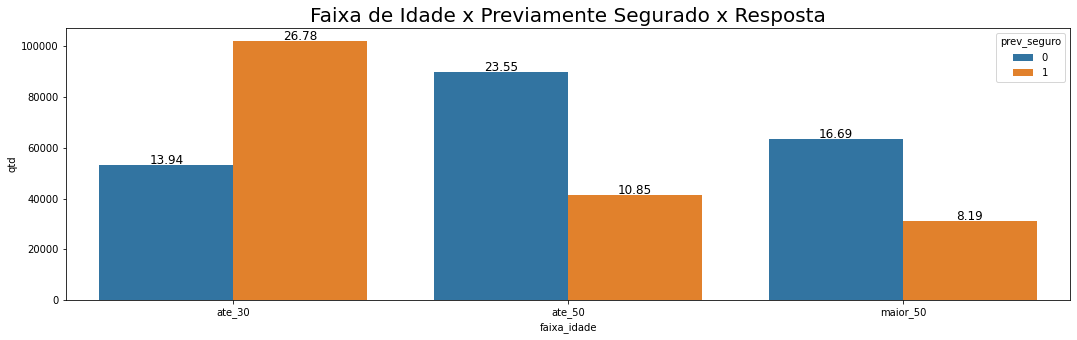

In [137]:
plt.figure(figsize = (18, 5))
plt.title('Faixa de Idade x Previamente Segurado x Resposta',fontsize=20)
ax=data[['faixa_idade','prev_seguro']].groupby(['faixa_idade','prev_seguro']).size().reset_index().rename(columns={0:'qtd'})
ax=sns.barplot(data=ax,x='faixa_idade',y='qtd',hue='prev_seguro');
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')


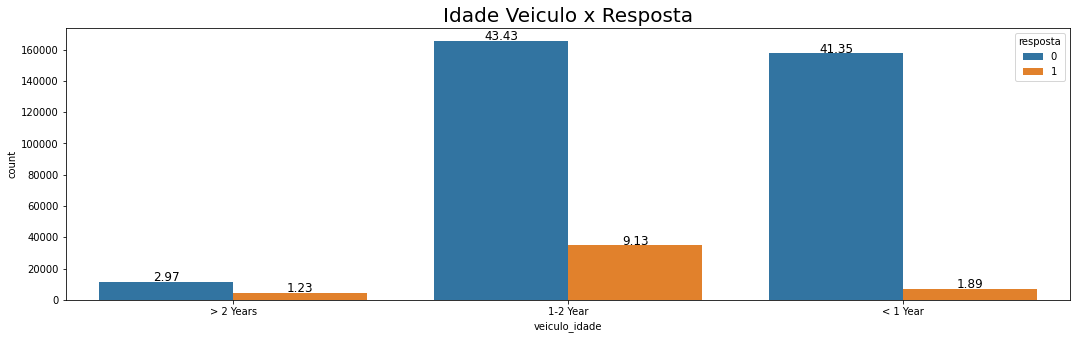

In [138]:
plt.figure(figsize = (18, 5))
plt.title('Idade Veiculo x Resposta',fontsize=20)
ax=sns.countplot(data['veiculo_idade'], hue = data['resposta'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
#clientes que possuem veículo com mais de 2 anos tem maior probabilidade de se interessar pelo seguro do veículo


In [139]:
pd.crosstab(index = data['prev_seguro'], columns = data['veiculo_idade'], normalize = 'columns')
#Quanto mais novo o veículo, maior a probabilidade de estar segurado


veiculo_idade,1-2 Year,< 1 Year,> 2 Years
prev_seguro,,,
0,0.67389,0.336976,0.997126
1,0.32611,0.663024,0.002874


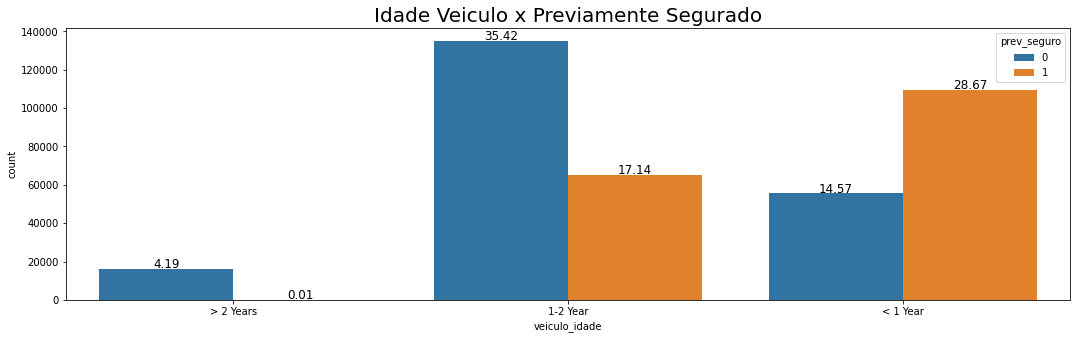

In [140]:
plt.figure(figsize = (18, 5))
plt.title('Idade Veiculo x Previamente Segurado',fontsize=20)
ax=sns.countplot(data['veiculo_idade'], hue = data['prev_seguro'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')

In [141]:
pd.crosstab(index = data['resposta'], columns = [data['veiculo_idade'], data['prev_seguro']], normalize = 'columns')


veiculo_idade  1-2 Year            < 1 Year           > 2 Years          
prev_seguro           0         1         0         1         0         1
resposta                                                                 
0              0.742864  0.998546  0.871419  0.999433   0.70547  0.978261
1              0.257136  0.001454  0.128581  0.000567   0.29453  0.021739

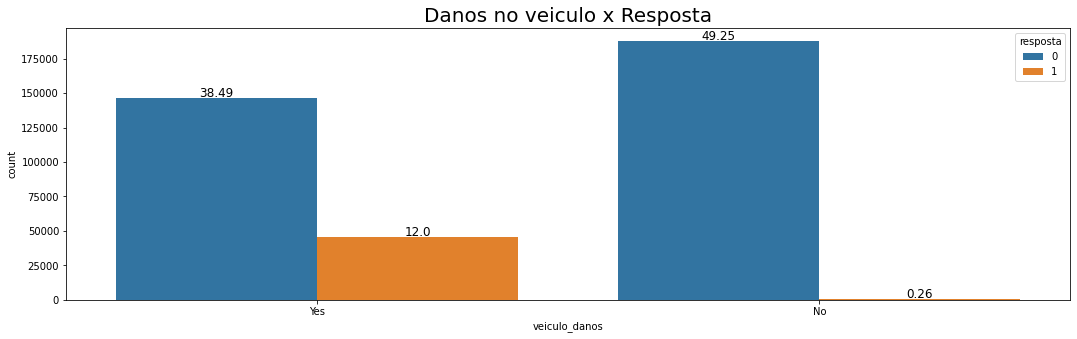

In [142]:
plt.figure(figsize = (18, 5))
plt.title('Danos no veiculo x Resposta',fontsize=20)
ax=sns.countplot(data['veiculo_danos'], hue = data['resposta'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')


In [143]:
pd.crosstab(index = data['resposta'], columns = data['veiculo_danos'], normalize = 'index')
# Dos clientes que tiveram danos no veiculo 98% tem interesse em contratar seguro


veiculo_danos,No,Yes
resposta,,
0,0.561347,0.438653
1,0.021023,0.978977


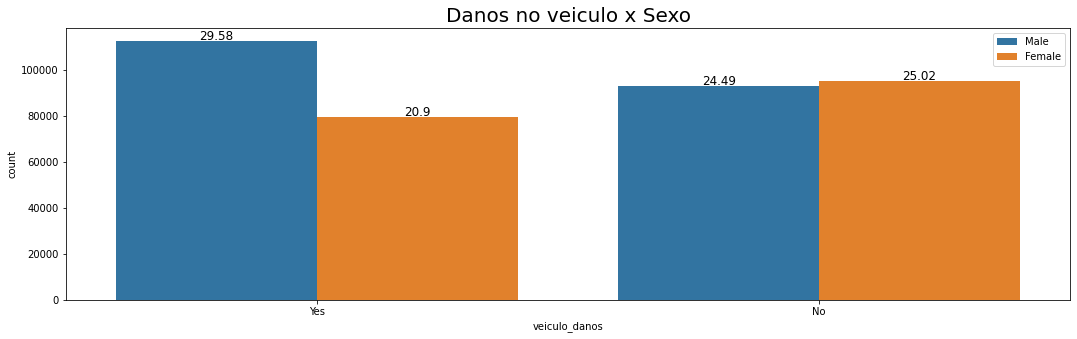

In [144]:
plt.figure(figsize = (18, 5))
plt.title('Danos no veiculo x Sexo',fontsize=20)
ax=sns.countplot(data['veiculo_danos'], hue = data['sexo'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
ax.legend(loc = 1)


 #homens tem mais danos em veiculos do que mulheres 

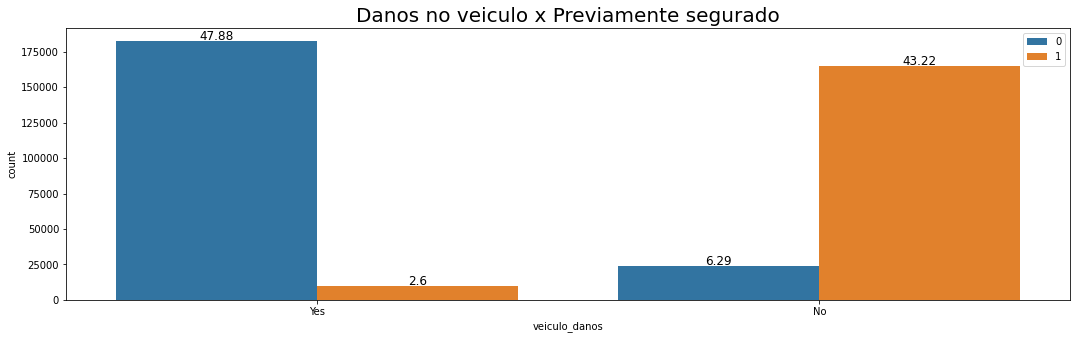

In [145]:
plt.figure(figsize = (18, 5))
plt.title('Danos no veiculo x Previamente segurado',fontsize=20)
ax=sns.countplot(data['veiculo_danos'], hue = data['prev_seguro'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
ax.legend(loc = 1)
#clientes que tiveram seu veículo danificado anteriormente não possuem seguro do veículo
# 87% dos clientes que nunca tiveram nenhum veículo danificado possuem seguro de veículo
# Pessoas que têm seguro de veículo são mais propensas a ter cuidado com seu veículo


In [146]:
pd.crosstab(index = data['prev_seguro'], columns = data['veiculo_danos'], normalize = 'columns')


veiculo_danos,No,Yes
prev_seguro,,
0,0.127136,0.948434
1,0.872864,0.051566


In [147]:
pd.crosstab(data.veiculo_idade, data.veiculo_danos, normalize = 'index')
# Carros com mais de 2 anos são mais propensos a ter sofrido algum dano

veiculo_danos,No,Yes
veiculo_idade,,
1-2 Year,0.359886,0.640114
< 1 Year,0.707524,0.292476
> 2 Years,0.000937,0.999063


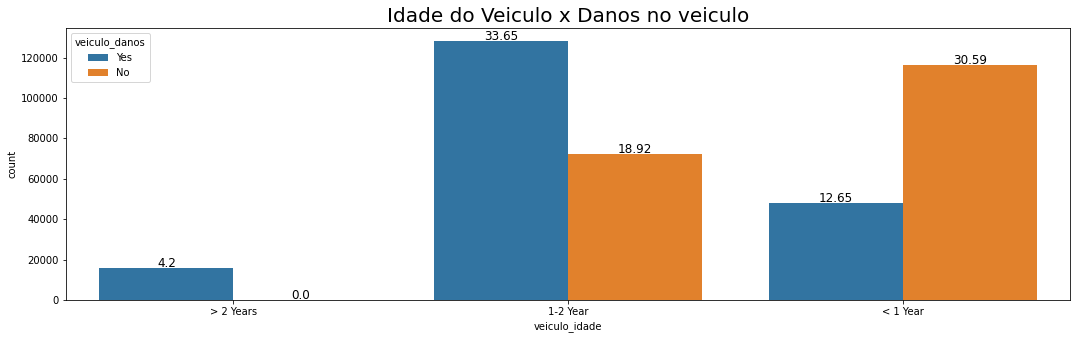

In [148]:
plt.figure(figsize = (18, 5))
plt.title('Idade do Veiculo x Danos no veiculo',fontsize=20)
ax=sns.countplot(data['veiculo_idade'], hue = data['veiculo_danos'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')

In [149]:
pd.crosstab(index = data['resposta'], columns = [data['veiculo_danos'], data['prev_seguro']], normalize = 'index')
#dos clientes interessados a maioria deles não tem seguro do veículo e teve danos no veículo no passado
#clientes que nunca tiveram danos no veículo e possuem seguro de não  estão interessado em outro seguro de veículo


veiculo_danos        No                 Yes          
prev_seguro           0         1         0         1
resposta                                             
0              0.069019  0.492328  0.409239  0.029414
1              0.019482  0.001541  0.977136  0.001841

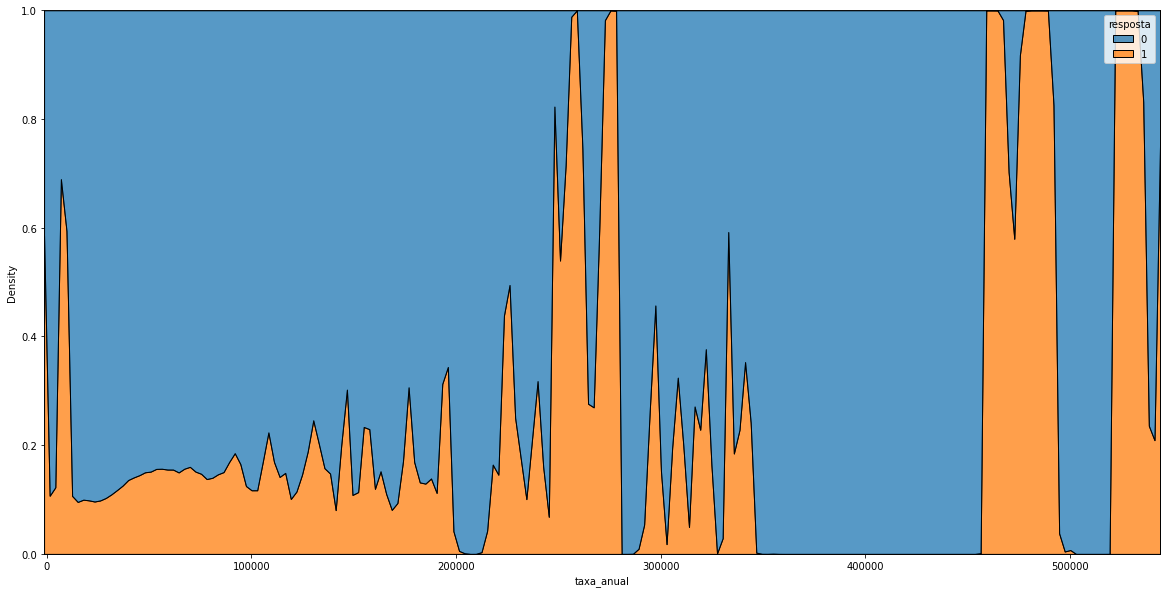

In [150]:
plt.figure(figsize=(20,10))
sns.kdeplot(data=data, x = 'taxa_anual', hue = 'resposta',multiple='fill')
           
    

In [151]:
data[['resposta','taxa_anual']].groupby(['resposta']).median()

,taxa_anual
resposta,
0,31504.0
1,33002.0


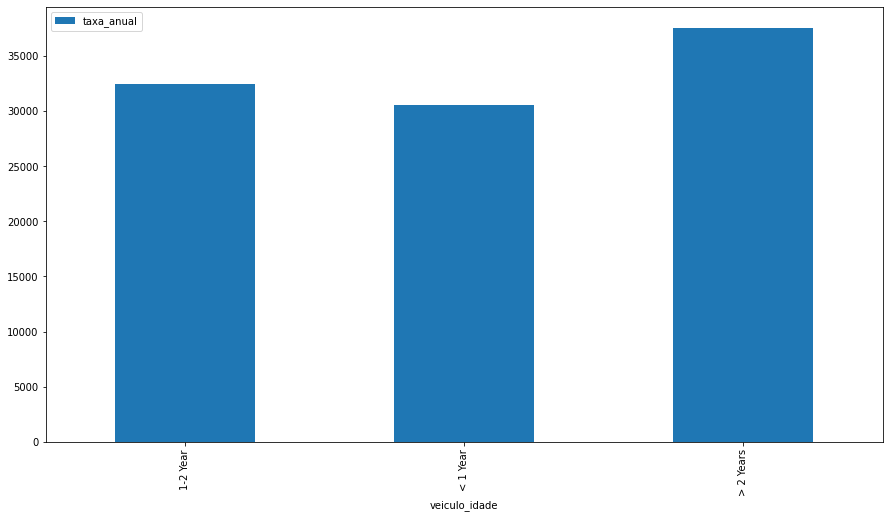

In [152]:
data[['veiculo_idade','taxa_anual']].groupby(['veiculo_idade']).median().plot(kind='bar',figsize=(15,8))
#A taxa anual media maior para veiculos com mais de 2 anos

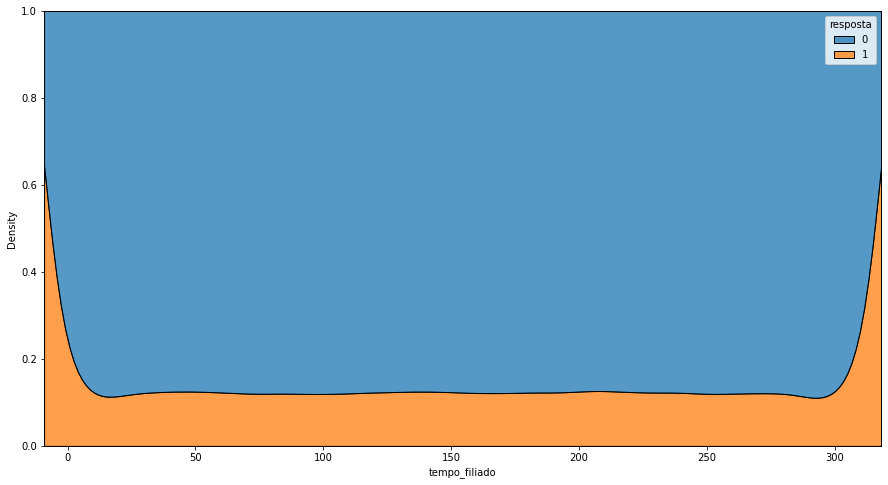

In [153]:
plt.figure(figsize=(15,8))
sns.kdeplot(data=data, x = 'tempo_filiado', hue = 'resposta',multiple='fill')

In [154]:
data[['resposta','tempo_filiado']].groupby(['resposta']).mean()
# Tempo de filiacao não interfere na resposta do cliente

,tempo_filiado
resposta,
0,154.380243
1,154.112246


In [155]:
pd.crosstab(index = data['faixa_idade'], columns = data['veiculo_danos'], normalize = 'index')
# GenX e Boomer são as que mais tem veiculos que sofreram danos

veiculo_danos,No,Yes
faixa_idade,,
ate_30,0.698827,0.301173
ate_50,0.357074,0.642926
maior_50,0.352548,0.647452


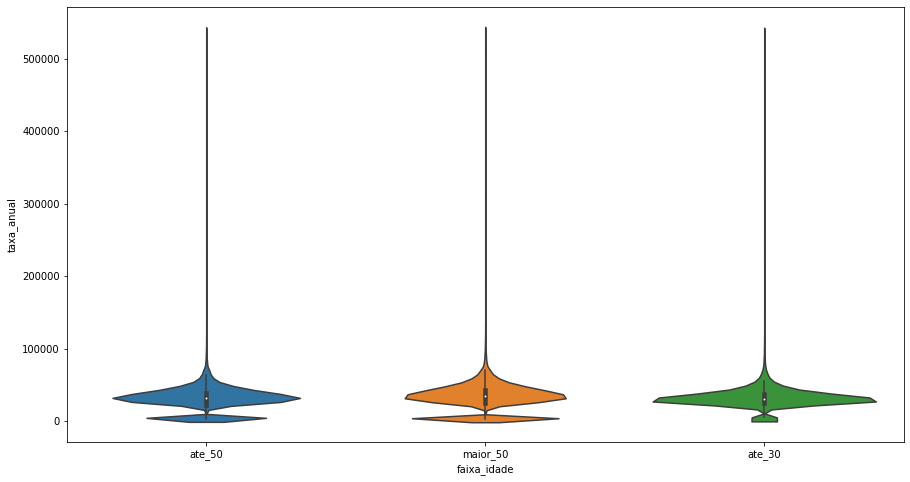

In [156]:
plt.figure(figsize=(15,8))
sns.violinplot(x=data['faixa_idade'], y = data['taxa_anual'],split=True)


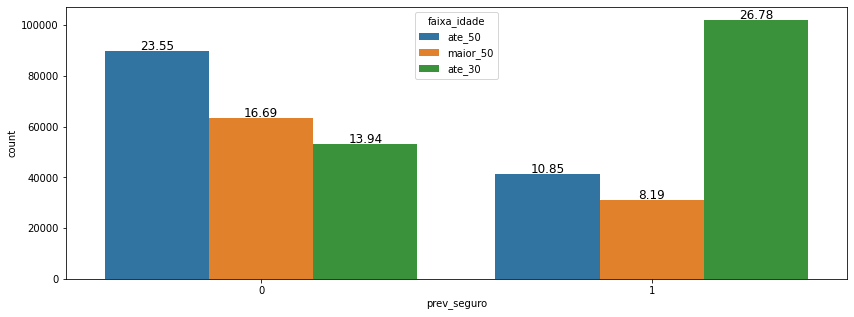

In [157]:
plt.figure(figsize = (14, 5))
ax=sns.countplot(x = data['prev_seguro'], hue = data['faixa_idade'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')



In [158]:
pd.crosstab(index = data['faixa_idade'], columns = data['prev_seguro'], normalize = 'index')
# clientes ate 30 anos 65,7% já possuem previamente seguro de automovel
# clientes com mais de 30 ate 50 anos 68% não possuem previamente seguro de automovel


prev_seguro,0,1
faixa_idade,,
ate_30,0.342287,0.657713
ate_50,0.684689,0.315311
maior_50,0.670784,0.329216


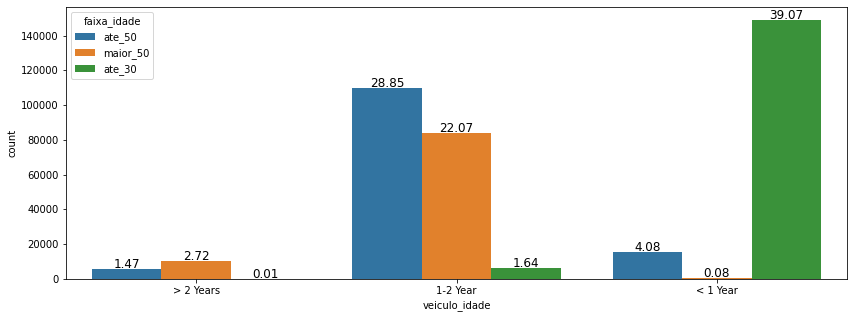

In [159]:
plt.figure(figsize = (14, 5))
ax=sns.countplot(x = data['veiculo_idade'], hue = data['faixa_idade'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
 # cliente com até 30 anos tem veiculos com menos de 1 ano de idade


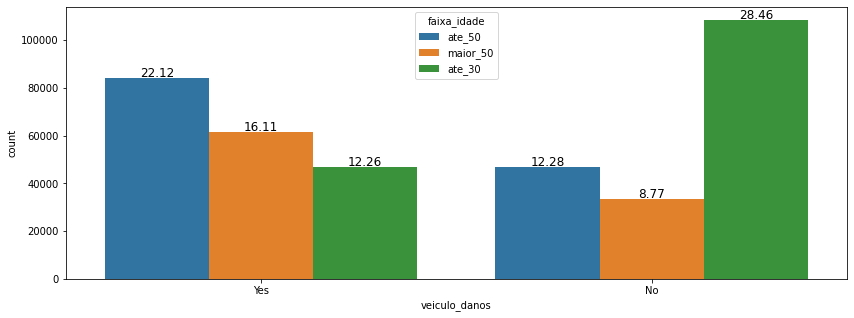

In [160]:
plt.figure(figsize = (14, 5))
ax=sns.countplot(x = data['veiculo_danos'], hue = data['faixa_idade'])
for i in ax.patches:
  ax.annotate((i.get_height()/len(data)*100).round(2),
             (i.get_x() + i.get_width()/2,i.get_height()),
             ha='center',va='baseline',fontsize=12,color='black',
             xytext=(0,1),textcoords='offset points')
# cliente com mais de 30 anos e menos de 50 possuem a maior porcentagem de veiculos com danos

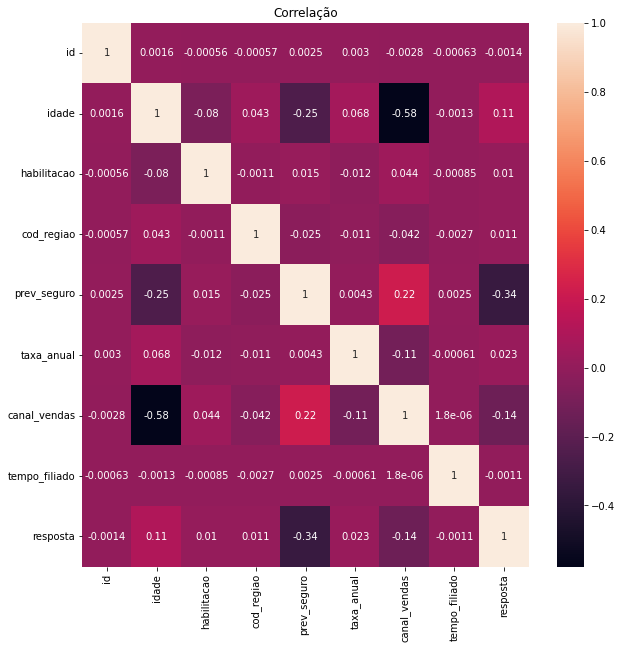

In [161]:
plt.figure(figsize = (10,10))
plt.title("Correlação")
corr_num= var_num.corr()
sns.heatmap(corr_num,annot=True);


# **Overview dos Dados**

* Apenas 12% dos clientes estão interessados ​​em comprar um seguro de veículo
* A média de dias  em que um clientes  se filiou na empresa é de 154 dias
* Não ha tantos dados sobre não habilitados porque a maioria deles é acima dos 60 anos e a maioria dos clientes da base esta na faixa de 40 anos
* Homens possuem mais interesse em contratar seguro de automovel do que mulheres
* canal de vendas 152,26,124 são os que possuem uma taxa de sucesso mais efetiva em realizar vendas
* os demais canais ficam abaixo de 5% de resposta efetiva
* código de região 28 tem o maior número de clientes enquando o codigo 52 possui o menor
* A regiao 38 possui mais clientes interessados se comparada com a regiao 28
* idade média do cliente interessado no seguro do veículo é de 43 anos
* Tempo de filiacao não interfere na resposta do cliente talvez porque nenhum cliente está na seguradora há 1 ano inteiro.
* dos clientes que não possuem seguro apenas 12% se mostraram interessados em adquirir um seguro de automovel
* dos clientes interessados a maioria deles não tem seguro do veículo 
* 98% cliente dos que tiveram danos no veículo no passado tem interesse em contratar seguro
* 87% dos clientes que nunca tiveram nenhum veículo danificado e possuem seguro  podemos dizer que elas são mais propensas a ter cuidado com seu veículo
* Quanto mais novo o veículo, maior a probabilidade de estar segurado
* 4% dos clientes têm veículo com mais de 2 anos,e a taxa anual media é maior para esse tipo de veiculo e estes são mais propensos a ter sofrido algum dano. Os clientes que possuem esse tipo de veiculo tem maior probabilidade de se interessar pelo seguro.



